In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ElectricityProduction.csv')

In [3]:
data.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-01-02,70.6720
2,1985-01-03,62.4502
3,1985-01-04,57.4714
4,1985-01-05,55.3151


In [4]:
data['DATE'][0]

'1985-01-01'

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [6]:
data['DATE'][0]

Timestamp('1985-01-01 00:00:00')

In [7]:
ts_data = data.set_index(['DATE'])

In [8]:
ts_data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151


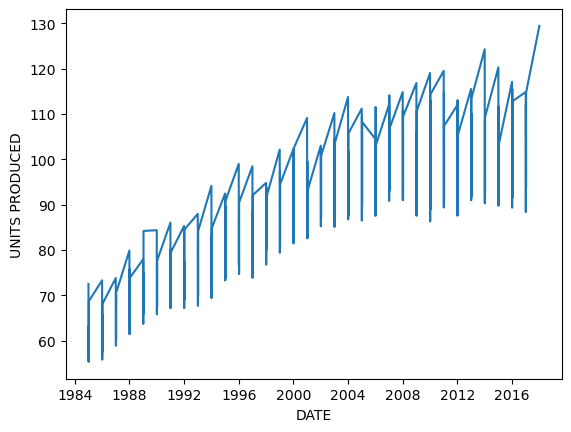

In [9]:
plt.xlabel("DATE")
plt.ylabel("UNITS PRODUCED")
plt.plot(ts_data)

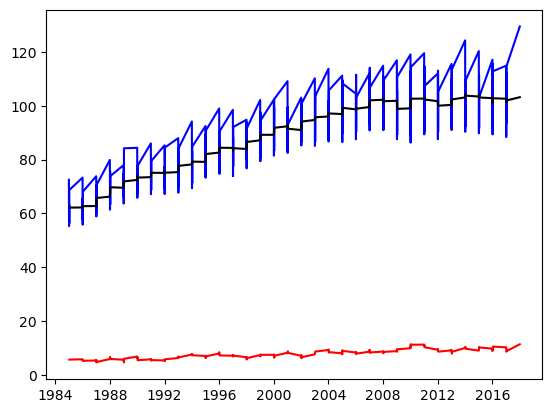

In [10]:
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

In [11]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(ts_data['IPG2211A2N'])
print(dftest)

(-2.2569903500472455, 0.18621469116586759, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)


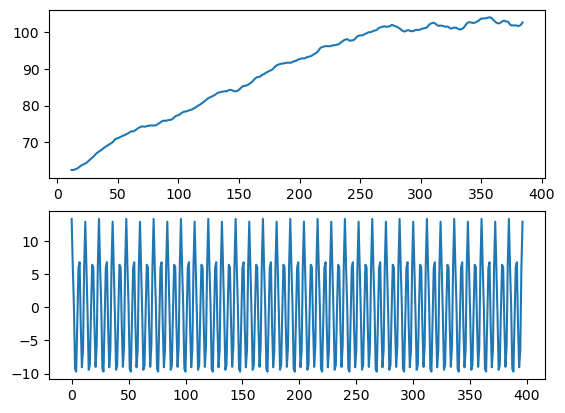

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data.iloc[-2000:].values,model='Additive',period=24)

trend = decompose.trend
season = decompose.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [13]:
ts_data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151
...,...
2017-01-09,98.6154
2017-01-10,93.6137
2017-01-11,97.3359


In [14]:
ts_data_new = ts_data['IPG2211A2N'] - ts_data['IPG2211A2N'].shift(2)

In [15]:
ts_data_new

DATE
1985-01-01        NaN
1985-01-02        NaN
1985-01-03   -10.0550
1985-01-04   -13.2006
1985-01-05    -7.1351
               ...   
2017-01-09   -13.5384
2017-01-10   -15.3175
2017-01-11    -1.2795
2017-01-12    21.1075
2018-01-01    32.0689
Name: IPG2211A2N, Length: 397, dtype: float64

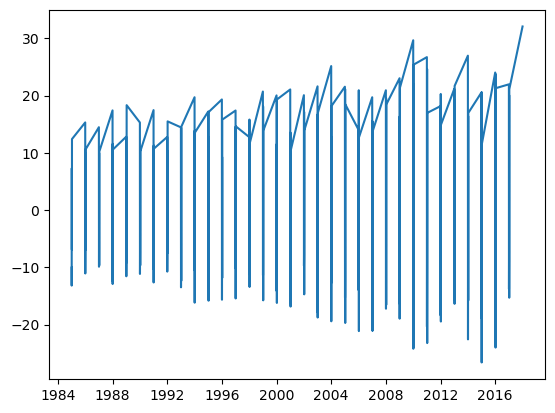

In [16]:
plt.plot(ts_data_new)

In [17]:
adfuller(ts_data_new.dropna())

(-7.197851221034593,
 2.408360962361176e-10,
 13,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.7757071928977)

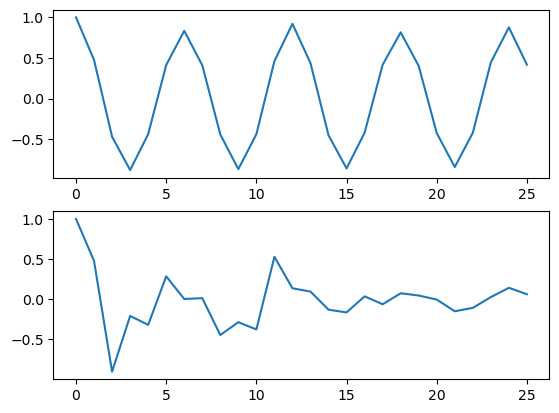

In [18]:
from statsmodels.tsa.stattools import acf, pacf

acf_plot = acf(ts_data_new.dropna())
pacf_plot = pacf(ts_data_new.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, order=(1,0,0))
model_fit = model.fit()

C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
model_fit.forecast(24)

C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


397    124.523750
398    120.236355
399    116.470410
400    113.162496
401    110.256904
402    107.704703
403    105.462911
404    103.493775
405    101.764134
406    100.244859
407     98.910365
408     97.738178
409     96.708557
410     95.804163
411     95.009765
412     94.311985
413     93.699072
414     93.160704
415     92.687815
416     92.272441
417     91.907586
418     91.587106
419     91.305605
420     91.058340
Name: predicted_mean, dtype: float64

In [21]:
res = model_fit.forecast(24)

C:\Users\Srinidhi Tarigoppula\OneDrive\Documents\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\Srinidhi Tarigoppula\AppData\Local\Temp\ipykernel_29880\1464484915.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_pred.append(res)


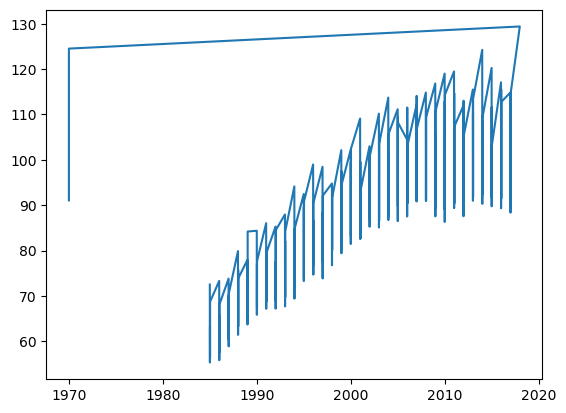

In [22]:
res = pd.DataFrame(res)
res.columns = ['IPG2211A2N']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)

plt.plot(ts_data_pred)